# COGS 108 - Final Project 

# Overview

My project analyzes the relationship between the Yelp's rating of the park and the number of crimes near that park. My approach is to measure whether there is a correlation between the average Yelp's rating of each park and the total number of crimes happened near that park in the recent 5 years (2016-2020). I also explore the geospatial data for both parks and crimes to get a better understanding of the distribution and the potential concentration. After geospatial analysis and linear regression analysis, it turns out that there is a very poor negative correlation between these two variables. 

# Name & GitHub

- Name: Jiachen Ma
- GitHub Username: StephenMaaa

# Research Question

Is there a relationship between the Yelp's rating of the park and the number of crimes near that park? 

## Background and Prior Work

Currently, there are 400+ parks in San Diego, with 40,000+ acres of park assets [1]. A large group of them distributes near the coastal line, and also many distribute near the mountains.  
People are more aware of the safety, self-protection, the potential danger and crime around themselves. Given that increasing needs, the City of San Diego government has recorded the crime statistics and plotted the crime maps since 1950. A variety of crime statistics and crime maps are available and updates weekly on Automated Regional Justice Information System (ARJIS) web site [2]. Also, people can get access to the police calls for dispatch for various crimes through the government's public web database [3].  
Many people like to view the overall ratinig of the park and reviews before they decide to go to, especially the funny reviews posted by others. There are tons of blogs with the tag "the funniest/hilarious reviews of national parks" [4]. People are interested in learning other's suggestions so that Yelp's rating of a park and the corresponding reviews can be decisve for choosing the one they wanna go.  

References (include links):
- [1] https://www.sandiego.gov/park-and-recreation/general-info#parks-modal
- [2] https://www.sandiego.gov/police/services/statistics
- [3] https://data.sandiego.gov/datasets/police-calls-for-service/
- [4] https://www.farandwide.com/s/funniest-yelp-reviews-national-parks-8eaed16980024eb3

# Hypothesis


I hypothesize that the there is a negative correlation between Yelp's rating of a park and the number of crimes near that park. Because people normally care about their safety, they won't like to choose the park with more potential dangers around. Therefore, the less the number of crime, the higher the rating of that park.

# Dataset(s)

The datasets I used:

- Dataset Name: SD Parks & Recreation Location Data
- Link to the dataset: https://data.sandiego.gov/datasets/park-locations/
- Number of observations: 2769
- Description: This dataset includes data about the park's basic information and its geospatial data (geometry coordinate). The variables available (but are not limited to) include name, size, ownership, and geometry. 


- Dataset Name: San Diego Parks Yelp Data
- Link to the dataset: https://www.yelp.com/
- Number of observations: 833
- Description: This dataset includes data about the park's coordinate, overall rating (0-5) from Yelp. The variables available (but not limited to) include name, latitude, longtitude, rating, review_count, etc. 


- Dataset Name: Police Calls for Service 2020
- Link to the dataset: https://data.sandiego.gov/datasets/police-calls-for-service/
- Number of observations: 522569
- Description: This dataset includes data about police calls for dispatch in 2020-present. The variables available (but not limited to) include address number, direction, road name, road/street type and other disposition information. 


- Dataset Name: Police Calls for Service 2019
- Link to the dataset: https://data.sandiego.gov/datasets/police-calls-for-service/
- Number of observations: 590967
- Description: This dataset includes data about police calls for dispatch in 2019. The variables available (but not limited to) include address number, direction, road name, road/street type and other disposition information. 


- Dataset Name: Police Calls for Service 2018
- Link to the dataset: https://data.sandiego.gov/datasets/police-calls-for-service/
- Number of observations: 570459
- Description: This dataset includes data about police calls for dispatch in 2019. The variables available (but not limited to) include address number, direction, road name, road/street type and other disposition information. 


- Dataset Name: Police Calls for Service 2017
- Link to the dataset: https://data.sandiego.gov/datasets/police-calls-for-service/
- Number of observations: 580577
- Description: This dataset includes data about police calls for dispatch in 2019. The variables available (but not limited to) include address number, direction, road name, road/street type and other disposition information.


- Dataset Name: Police Calls for Service 2016
- Link to the dataset: https://data.sandiego.gov/datasets/police-calls-for-service/
- Number of observations: 586703
- Description: This dataset includes data about police calls for dispatch in 2019. The variables available (but not limited to) include address number, direction, road name, road/street type and other disposition information.


I will use SD Parks & Recreation Location Data for analyzing the geospatial distribution of parks. And for Police Calls for Service in 2016-2020, I will take 2000 observations from each year's data and totally 10000 observations for analyzing the geospatial distribution of crimes and the potential relationship with the rating of the park. I will use San Diego Parks Yelp Data to assist with the police calls data, in order to get the number of crimes nearby each park. 

# Setup

In [2]:
## YOUR CODE HERE
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from geopy.geocoders import Nominatim
import seaborn as sns
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import matplotlib.patches as mpatches
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

geolocator = Nominatim(user_agent="project")

In [3]:
## geospatial data for SD parks
df_park = gpd.read_file("../data/parks_datasd.geojson")

## police calls for service in 2016-2020
df_crime_20 = pd.read_csv("../data/pd_calls_for_service_2020_datasd.csv")
df_crime_19 = pd.read_csv("../data/pd_calls_for_service_2019_datasd.csv")
df_crime_18 = pd.read_csv("../data/pd_calls_for_service_2018_datasd.csv")
df_crime_17 = pd.read_csv("../data/pd_calls_for_service_2017_datasd_v1.csv")
df_crime_16 = pd.read_csv("../data/pd_calls_for_service_2016_datasd_v1.csv")

## if geocode() takes too long time to execute, use the df_crime from the csv I've saved after my first execution
# df_crime = pd.read_csv("data_final.csv") 

## Yelp's rating for SD parks
df_yelp_parks = pd.read_csv("../data/yelp_SD_parks.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,9,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Cleaning

Firstly, I dropped the columns that I won't use in the analysis. For San Diego parks Yelp dataset, I dropped the unnecessary data like address as I've already have coordinate information. For datasets of police calls for service from 2016 to 2020, I dropped data about dispostion and only kept the data about the address, so that later I can identify the location of crimes.

In [4]:
## Drop the columns 
df_yelp_parks = df_yelp_parks.drop(["id", "is_closed", "address", "phone", "url"], axis = 1)

df_crime_20 = df_crime_20[["address_number_primary", "address_dir_primary", "address_road_primary", "address_sfx_primary"]]
df_crime_19 = df_crime_19[["address_number_primary", "address_dir_primary", "address_road_primary", "address_sfx_primary"]]
df_crime_18 = df_crime_18[["address_number_primary", "address_dir_primary", "address_road_primary", "address_sfx_primary"]]
df_crime_17 = df_crime_17[["address_number_primary", "address_dir_primary", "address_road_primary", "address_sfx_primary"]]
df_crime_16 = df_crime_16[["address_number_primary", "address_dir_primary", "address_road_primary", "address_sfx_primary"]]

For San Diego parks Yelp dataset, I removed the rows for parks with less than or equal to 5 review_count (195 such parks). As the rating from less than or equal to 5 persons may not reflect the real quality of that park. Also, add a new column crime_count to count the crimes nearby. 

In [5]:
df_yelp_parks = df_yelp_parks[df_yelp_parks['review_count'] > 5]
df_yelp_parks["crime_count"] = 0

print(all(i >= 5 for i in df_yelp_parks['review_count'].unique()))
df_yelp_parks.head()

True


,name,rating,review_count,longitude,latitude,crime_count
0,Balboa Park,5.0,2105,-117.153150,32.734502,0
1,Civita Park,4.5,46,-117.147278,32.778315,0
2,Waterfront Park,4.5,242,-117.172479,32.721952,0
3,Trolley Barn Park,4.5,102,-117.143789,32.762463,0
4,Bay View Park,5.0,42,-117.178967,32.701785,0


In order to inclusively and comprehensively analyze the relationship between Yelp's rating of the park and the number of crimes nearby, I used the data of police calls from 2016-2020 and I took 1000 samples from each year. 

In [22]:
## Take 2000 samples from the crime dataset for each year in 2016-2020 and concatenate together
# The reason I took the data at [0:250] and [500:2250] is that I ran this twice due to the computing limits.  
# In the first time, I used the data at [0:250] and saved the result in a csv; and in the second time, I used the data  
# at [500:2250] and save the result in another csv file. Later I concat them together and did analysis.
df_crime = pd.concat([df_crime_20[0:250], df_crime_20[500:2250], df_crime_19[0:250], df_crime_19[500:2250],
                      df_crime_18[0:250], df_crime_18[500:2250], df_crime_17[0:250], df_crime_17[500:2250],
                      df_crime_16[0:250], df_crime_16[500:2250]], ignore_index=True)
df_crime

,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary
0,400,NaN,06TH,AVE
1,5000,NaN,UNIVERSITY,AVE
2,800,NaN,SAWTELLE,AVE
3,5000,NaN,UNIVERSITY,AVE
4,5200,NaN,CLAIREMONT MESA,BLV
...,...,...,...,...
9995,3200,NaN,TENNYSON,ST
9996,0,NaN,EL CAMINO REAL,NaN
9997,8900,NaN,GENESEE,AV
9998,5100,NaN,EWING,ST


To count the number of crimes nearby, we have to get the location (lattitude, longitude) of the crime. In our crime data, we have the address number, direction, primary road name, and the type of road/street. Trying out on the Google Maps multiple times, since we've already known all crimes happened in San Diego, I found that the most important information we need to locate a crime is the primary road name, as it restricts to a specific road. Hence, I dropped all rows with missing primary road name.

In [24]:
# Drop rows with missing primary road name
df_crime = df_crime.dropna(subset = ["address_road_primary"])
df_crime.shape

(9996, 4)

Now, using the information from address number, direction, primary road name, and the type of road/street, we can almost recover the accurate address in the format: address_number + direction + primary_road_name + road/street_type, San Diego, CA, USA. For example, 5000 UNIVERSITY AVE, San Diego, CA, USA. Note that I dropped all NaN values when formatting the address. 

In [25]:
df_crime['address'] = df_crime[df_crime.columns[0:]].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1) + ", San Diego, CA, USA"

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df_crime.head()

,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address
0,400,NaN,06TH,AVE,"400 06TH AVE, San Diego, CA, USA"
1,5000,NaN,UNIVERSITY,AVE,"5000 UNIVERSITY AVE, San Diego, CA, USA"
2,800,NaN,SAWTELLE,AVE,"800 SAWTELLE AVE, San Diego, CA, USA"
3,5000,NaN,UNIVERSITY,AVE,"5000 UNIVERSITY AVE, San Diego, CA, USA"
4,5200,NaN,CLAIREMONT MESA,BLV,"5200 CLAIREMONT MESA BLV, San Diego, CA, USA"


With the address of the crime, I applied the geocode to transform the address to coordinate (latitude, longitude). And then I extracted latitude and longtitude from geocode and added to the new columns. 

In [28]:
## apply geocode to the address to get the coordinate
df_crime["loc"] = df_crime["address"].apply(geolocator.geocode)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
# df_crime.to_csv("record.csv")
## return the Point of that crime, used for geospatial analysis later
df_crime["point"]= df_crime["loc"].apply(lambda loc: tuple(loc.point) if loc else None)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
df_crime

,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address,loc,point
0,400,NaN,06TH,AVE,"400 06TH AVE, San Diego, CA, USA",None,None
1,5000,NaN,UNIVERSITY,AVE,"5000 UNIVERSITY AVE, San Diego, CA, USA","(University Avenue, Cherokee Point, Normal Hei...","(32.7497606, -117.1186691, 0.0)"
2,800,NaN,SAWTELLE,AVE,"800 SAWTELLE AVE, San Diego, CA, USA","(Sawtelle Avenue, Lomita, San Diego, San Diego...","(32.7117177, -117.0269166, 0.0)"
3,5000,NaN,UNIVERSITY,AVE,"5000 UNIVERSITY AVE, San Diego, CA, USA","(University Avenue, Cherokee Point, Normal Hei...","(32.7497606, -117.1186691, 0.0)"
4,5200,NaN,CLAIREMONT MESA,BLV,"5200 CLAIREMONT MESA BLV, San Diego, CA, USA","(Clairemont Mesa Boulevard, San Diego, San Die...","(32.8335646, -117.1194774, 0.0)"
...,...,...,...,...,...,...,...
9995,3200,NaN,TENNYSON,ST,"3200 TENNYSON ST, San Diego, CA, USA","(Tennyson Street, Ocean Beach, San Diego, San ...","(32.7413287, -117.2346468, 0.0)"
9996,0,NaN,EL CAMINO REAL,NaN,"0 EL CAMINO REAL, San Diego, CA, USA","(San Diego, San Diego County, California, Unit...","(32.7174202, -117.1627728, 0.0)"
9997,8900,NaN,GENESEE,AV,"8900 GENESEE AV, San Diego, CA, USA","(Genesee Avenue, Torrey Pines, San Diego, San ...","(32.8903071, -117.2356658, 0.0)"
9998,5100,NaN,EWING,ST,"5100 EWING ST, San Diego, CA, USA","(Ewing Street, Montezuma Mesa, Del Cerro, San ...","(32.771488, -117.061562, 0.0)"


In [31]:
## Extract the latitude and longtitude
df_crime['latitude'] = df_crime["loc"].apply(lambda loc: tuple(loc.point)[0] if loc else None)
df_crime['longitude'] = df_crime["loc"].apply(lambda loc: tuple(loc.point)[1] if loc else None)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
## Remove all rows with None location from geocode 
df_crime = df_crime.dropna(subset = ["loc"])
df_crime = df_crime.reset_index(drop=True)
df_yelp_parks = df_yelp_parks.reset_index(drop=True)

## Save the data to a csv file for future use, because geocode is time-consuming. 
# df_crime.to_csv("data_final.csv")

# Data Analysis & Results

Before doing analysis, let's take a look at the geospatial distribution of SD parks. The blue shaded area represents the park and the corresponding size. Note that the latitude and longitude are scaled (epsg=3857) in order to present the geographical background. 

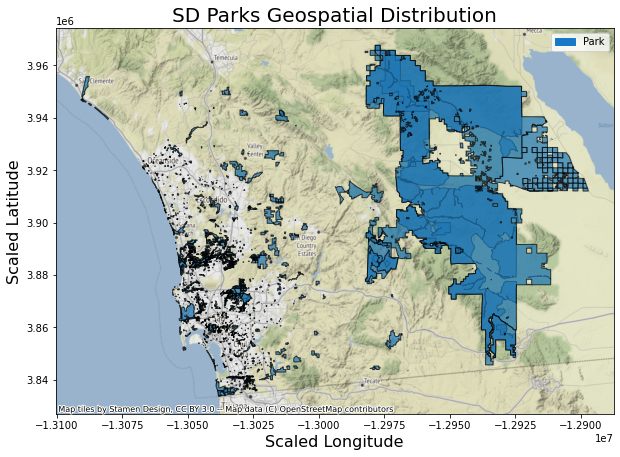

In [7]:
## Plot the geosatial data for SD parks
df = df_park.to_crs(epsg=3857)
ax = df.plot(figsize=(10, 10), alpha=0.7, edgecolor='k')
ax.set_xlabel('Scaled Longitude', size = 16)
ax.set_ylabel('Scaled Latitude', size = 16)
plt.title('SD Parks Geospatial Distribution', fontsize = 20)

park_legend = mpatches.Patch(color='#1A78C8', label='Park')
plt.legend(handles=[park_legend])
ctx.add_basemap(ax)

Similarly, let's take a look at the geospatial distribution of the crimes with scaled latitude and longitude (epsg = 3857). 

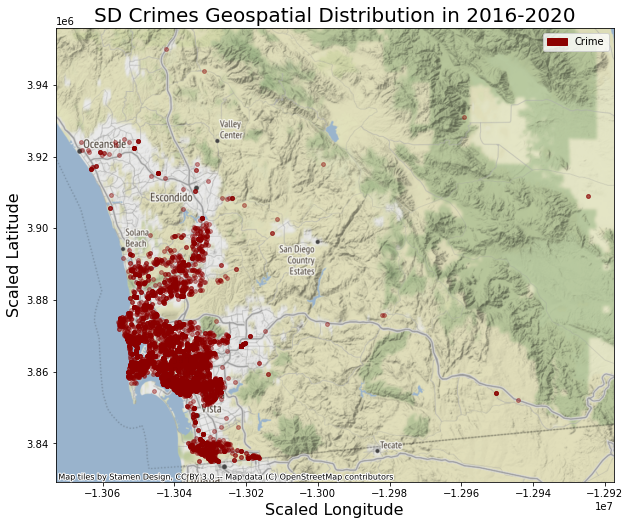

In [8]:
## Plot the geospatial data for SD crimes in 2016-2020
gdf_crime = gpd.GeoDataFrame(df_crime, geometry=gpd.points_from_xy(df_crime["longitude"], df_crime["latitude"]), crs = "EPSG:4326")
gdf_crime_m = gdf_crime.to_crs(epsg = 3857)

ax = gdf_crime_m.plot(figsize=(10, 10), alpha=0.4, color='darkred', markersize = 15)
ax.set_xlabel('Scaled Longitude', size = 16)
ax.set_ylabel('Scaled Latitude', size = 16)
plt.title('SD Crimes Geospatial Distribution in 2016-2020', fontsize = 20)

crime_legend = mpatches.Patch(color='darkred', label='Crime')
plt.legend(handles=[crime_legend])
ctx.add_basemap(ax)

From the above scatter plot, a large chunk of crimes happened at the costal area of San Diego. Now, let's plot those crimes on the plotting of SD parks geo-distribution to see if there's any visual connection. 

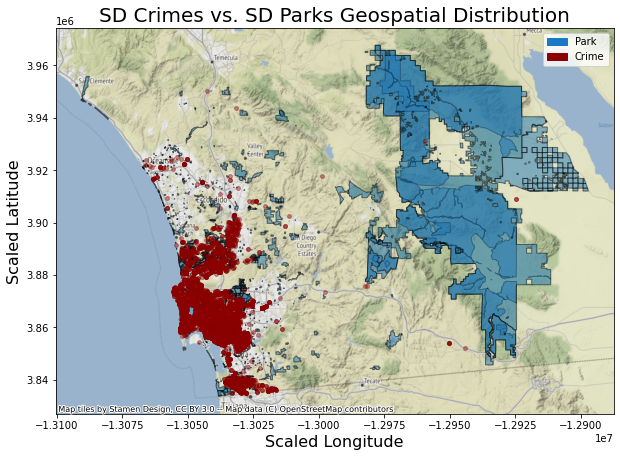

In [10]:
## Plot the geospatial data for both SD parks and SD crimes in 2016-2020
df = df_park.to_crs(epsg=3857)
gdf_crime = gpd.GeoDataFrame(df_crime, geometry=gpd.points_from_xy(df_crime["longitude"], df_crime["latitude"]), crs = "EPSG:4326")
gdf_crime_m = gdf_crime.to_crs(epsg = 3857)

fig, ax = plt.subplots(figsize=(10, 10))
df.plot(ax=ax, alpha=0.5, edgecolor='k')
gdf_crime_m.plot(ax = ax, alpha=0.4, color='darkred', markersize = 15)

ax.set_xlabel('Scaled Longitude', size = 16)
ax.set_ylabel('Scaled Latitude', size = 16)
plt.title('SD Crimes vs. SD Parks Geospatial Distribution', fontsize = 20)
park_legend = mpatches.Patch(color='#1A78C8', label='Park')
crime_legend = mpatches.Patch(color='darkred', label='Crime')
plt.legend(handles=[park_legend, crime_legend])

ctx.add_basemap(ax)

From the plot above, for parks at the costal area (left-bottom side in the plot), there are lots of crimes happened nearby in 2016-2020; for parks near the mountains at the inner area of San Diego (right-hand side in the plot), there are very few crimes happened nearby in 2016-2020.  

Based on this observation, let's check if there is a relation between the rating of a park and the number of crimes nearby. After filterinig out the parks with less than or equal to 5 reviews in SD parks yelp dataset, there are 638 parks remaining. For each crime happened, I calculated the distances between that crime and each park, and then labelled the park with the minimal distance to that crime and counted that crime as happened nearest to that park. Therefore, later I can use these statistics to analyze the potential relation between the rating and number of crimes. 

In [11]:
## Find the nearest neighbor/park for each crime
gdf_yelp_parks = gpd.GeoDataFrame(df_yelp_parks, geometry=gpd.points_from_xy(df_yelp_parks["longitude"], df_yelp_parks["latitude"]))
gdf_yelp_parks.crs = "epsg:4326"
gdf_yelp_parks = gdf_yelp_parks.to_crs(epsg = 4326)
gdf_crime = gdf_crime.to_crs(epsg = 4326)

for i in range(0, len(gdf_crime)): 
    crime = gdf_crime.iloc[i]
    distances = gdf_yelp_parks.geometry.distance(crime.geometry)
    df_yelp_parks.at[distances.idxmin(), "crime_count"] += 1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if __name__ == '__main__':


Plot the scatter matrix for rating and crime_count columns. 

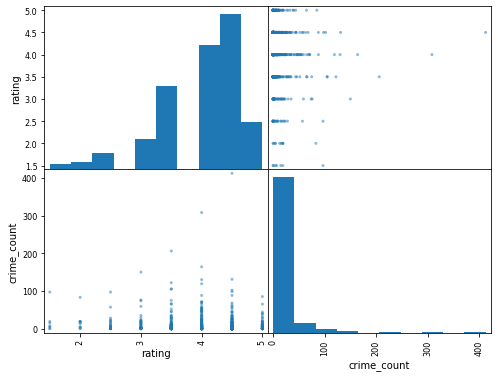

In [18]:
f = pd.plotting.scatter_matrix(df_yelp_parks[['rating', 'crime_count']], figsize = (8, 6))

Scatterplot matrix of Yelp Rating and Number of Crimes in df_yelp_parks

I noticed that the values in crime_count are extremely right skewed (which is not normally distributed). The prediction will be hurt if the data is not normally distributed. Therefore, to hold its normality, I performed a log transformation on the crime_count values.  
Note that there are lots of parks with crime_count = 0, meaning that there is no crime happened nearby (which is good). However, mathmetically, log transformation on 0 values is invalid. Here, instead of deleting these observations, I replaced all 0s on crime_count to 1s in favor of log transformation, while retaining the fact that these parks' crime counts are the lowest (0). 

In [13]:
df_yelp_parks = df_yelp_parks.assign(crime_count10 = df_yelp_parks['crime_count'].replace(0, 1))
df_yelp_parks['crime_count10'] = np.log10(df_yelp_parks['crime_count10'])

Now, after log transformation, let's take a look at the histogram of crime_count10. (Note that there is still a large chunk of crime values at 0 but that's ok, they contain meaningful values)

Text(0, 0.5, 'frequency')

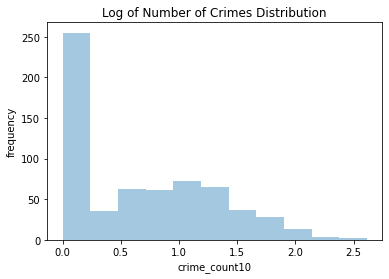

In [15]:
f = sns.distplot(df_yelp_parks['crime_count10'], kde=False)
f.set_title('Log of Number of Crimes Distribution')
f.set_ylabel('frequency')

Also, the values in rating seem a little bit left skewed. With the same reason of holding normality, I performed a square transformation on rating values to reduce the left skewness. 

In [19]:
df_yelp_parks['rating_squared'] = (df_yelp_parks['rating'] ** 2)

Text(0, 0.5, 'frequency')

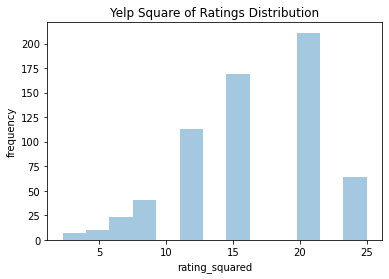

In [21]:
f = sns.distplot(df_yelp_parks['rating_squared'], kde=False)
f.set_title('Yelp Square of Ratings Distribution')
f.set_ylabel('frequency')

Now, the data distribution looks much more normal than before. And I calculated the correlation between them. 

Testing normality for crime_count10 and rating_squared. 

In [53]:
val_c = df_yelp_parks['crime_count10'].values
val_r = df_yelp_parks['rating_squared'].values

In [54]:
st_c, p_c = normaltest(val_c)
st_r, p_r = normaltest(val_r)
st_c, p_c, st_r, p_r

(92.95957409287394,
 6.517558915940554e-21,
 20.638981264296245,
 3.298391194641218e-05)

As p-values are greater than alpha = 0.05, I failed to reject the null hypothesis, meaning that the data is normally distributed. 

From the correlation matrix, I noticed that neither the correlation between rating and crime_count nor the correlation between rating_squared and crime_count10 is significant, which is very closed to 0.  
To conduct further analysis, I fitted a linear regression model using crime_count10 and rating_squared variables (these two variables hold normality) and tried to find the best fit line.

In [58]:
outcome, predictors = patsy.dmatrices('rating_squared ~ crime_count10', df_yelp_parks)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         rating_squared   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     5.872
Date:                Wed, 16 Dec 2020   Prob (F-statistic):             0.0157
Time:                        07:45:29   Log-Likelihood:                -1956.6
No. Observations:                 638   AIC:                             3917.
Df Residuals:                     636   BIC:                             3926.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        17.0036      0.291     58.337      0.000      16.431      17.576
crime_count10    -0.7815      0.323     -2.423      0.016      -1.415      -0.148
==============================================================================
Omnibus:                       18.572   Durbin-Watson:                   1.449
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.657
Skew:                          -0.421   Prob(JB):                     5.39e-05
Kurtosis:                       2.821   Cond. No.                         2.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the summary, for the null hypothesis with an alpha level of 0.05, as p-value = 0.016 < 0.05, we reject the null hypothesis. Therefore, crime_count10 is a significant variable in predicting.  
Let's interpret the outcome here: $(rating)^2 = -0.7815 \cdot log(crime \space count) + 17.0036$. Let's take two values of crime_count $r_1$ and $r_2$, the expected mean difference in crime_count $r_1$ and $r_2$ is: 

$$f(r_2) - f(r_1) = (-0.7815 \cdot log(r_2) + 17.0036) - (-0.7815 \cdot log(r_1) + 17.0036) = -0.7815 \cdot (log(r_2) - log(r_1) = -0.7815 \cdot log(\frac{r_2}{r_1})$$  
Therefore, as long as the percent increase in crime_count is fixed, the change (difference) in the square of rating is the same. For example, let's say there is 10% increase in the number of crimes, the change will be: $-0.7813 \cdot log(\frac{r_2}{r_1}) = -0.7815 \cdot log(1.1) = -0.0323$. Namely, the square of rating will decrease by 0.0323. As for the square operation, the actual rating will decrease by 0.1798.  


To sum up, given the number of crimes $r_1$ and $r_2$ (assume $r_2 \geq r_1$), the change of rating will be 

$$-\sqrt{0.7815 \cdot log(\frac{r_2}{r_1})}.$$ 



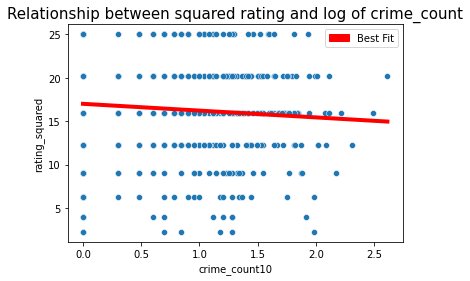

In [59]:
f, ax = plt.subplots()
f = sns.scatterplot(x='crime_count10', y='rating_squared', data = df_yelp_parks)
x = np.linspace(0, df_yelp_parks['crime_count10'].max())
ax.plot(x, -0.7813 * x + 17.0033, color = 'red', linewidth = 4)
ax.set(xlabel='crime_count10', ylabel='rating_squared')
plt.title('Relationship between squared rating and log of crime_count', fontsize = 15)
legend = mpatches.Patch(color='r', label='Best Fit')
plt.legend(handles=[legend])

From the scatter plot and the best fit line above, we can observe that there is a very poor negative linear relationship between the log of number of crimes nearby and the square of rating of that park. Correspondly, with the interpretation above, we can also know that there is a very poor negative correlation between the number of crimes nearby and the rating of park. 

# Ethics & Privacy

All datasets I used are public. SD Parks & Recreation Location Data is publicly accessible on the government's online database. Datasets of Police Calls for Service in 2016-2020 are also publicly accessible on the government's online database. San Diego Parks Yelp Data for park only is public via API to grab information about SD parks. Consider to the privacy, there is no personal information among all datasets I used. In the datasets Police Calls for Service in 2016-2020, there is no data related to the police's identification, victim's id or phone number. In the other two datasets, only park's information is provided, so there won't be any privacy violation. 


The overall ratings data can be biased, as there is no restriction or proofread for the rating people made. The Yelp's ratings may not reflect the entire population, since not everyone will leave a rating and review after visiting. Also, for some parks, the rating is collected from only few people based on the total number of reviews; therefore, the average rating from those few people can vary a lot. As the scale is from 0.0 to 5.0, a bad 1 star rating can blow the whole average rating down. However, currently there is no way to avoid such cases, so we've to keep this in mind that our analysis and result are subject to these potential bias. 


For the accuracy of the data, given the fact that all datasets either came from the public government's online database or from the Yelp's, I'm not able to verify if everything inside is accurate. Also, for the datasets of Police Calls for Service in 2016-2020, some attributes are related to disposition as they are labelled with letters and numbers with special meaning, so it's hard for me to completely understand the precise meaning of those codings, though I didn't include those information in my analysis.  

# Conclusion & Discussion

In this project, I tried to analyze the potential correlation between the rating of the park and the number of crimes nearby. In the analysis, I plotted the geospatial distribution for crimes in 2016-2020 and parks and founded that the majority of crimes happened in 5 years gathers at the costal area of San Diego, where has lots of parks; and very few crimes happened in the inner part of San Diego, where has parks near mountains. Then, I used the strategy of nearest neighbor/park to link every crime to a corresponding park in order to count the number of crimes nearby for each park. Later, I did analysis on the distribution of rating and number of crimes, applied data transformation to hold normality, and then fitted a linear regression model to get the result that there is a poor negative correlation between these two transformed variables. Finally, with mathematical induction on the outcome of the model, I conclude that there is a very poor negative correlation between the rating of the park and the number of crimes nearby. Hence, my initial hypothesis that they are negatively correlated is correct. 

The major limitation in this project is the computing limits. Since the server on the datahub has only 2 cpus, it takes me near 2 hours to get the geocode of the addresses from 10000 observations. Initially, I planned to use the whole datasets of Police Calls for Service in 2016-2020, which totally contains about 2500000 observations, which will takes the server to run more than 20 days to process. Therefore, due to this computing limit, I only used 10000 observations in total, which is still time-consuming.  
There is another limitation regarding to the Yelp's data. In the dataset of San Diego Parks Yelp Data for park only, many SD parks have only few numbers of reviews. In my data cleaning part, I filtered out all parks with less than or equal to 5 reviews (195 such parks in total). Even though, there are still many parks with less than 10 reviews. Due to the limited number of reviews, the corresponding average rating may not accurately or overrally represent the real quality of that park. Though I still used the data of parks with more than 5 reviews, I have to point out this limitation as it may affect the analysis result. 